In [1]:
# Import tensorflow y lo necesario para hacer nuestra CNN

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,initializers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importamos google drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importamos datos de los directporios utilizando imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator


In [19]:
# cargamos los directorios
traindata = ImageDataGenerator()
train_images = traindata.flow_from_directory(
    directory='/content/drive/MyDrive/TF/glasses-noglasses/train',
    target_size=(160,160),
    class_mode='categorical'
)
testdata = ImageDataGenerator()
test_images = testdata.flow_from_directory(
    directory='/content/drive/MyDrive/TF/glasses-noglasses/validate',
    target_size=(160,160),
    class_mode='categorical'
)

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar imágenes de entrenamiento
traindata = ImageDataGenerator(rescale=1./255)  # También puedes agregar otras configuraciones de aumento de datos aquí
train_images = traindata.flow_from_directory(
    directory='/content/drive/MyDrive/TF/glasses-noglasses/train',
    target_size=(160,160),
    class_mode='binary',  # Cambiar a 'binary' para clasificación binaria
    batch_size=32  # Ajustar el tamaño del lote según sea necesario
)

# Cargar imágenes de prueba/validación
testdata = ImageDataGenerator(rescale=1./255)
test_images = testdata.flow_from_directory(
    directory='/content/drive/MyDrive/TF/glasses-noglasses/validate',
    target_size=(160,160),
    class_mode='binary',  # Cambiar a 'binary' para clasificación binaria
    batch_size=32  # Ajustar el tamaño del lote según sea necesario
)

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


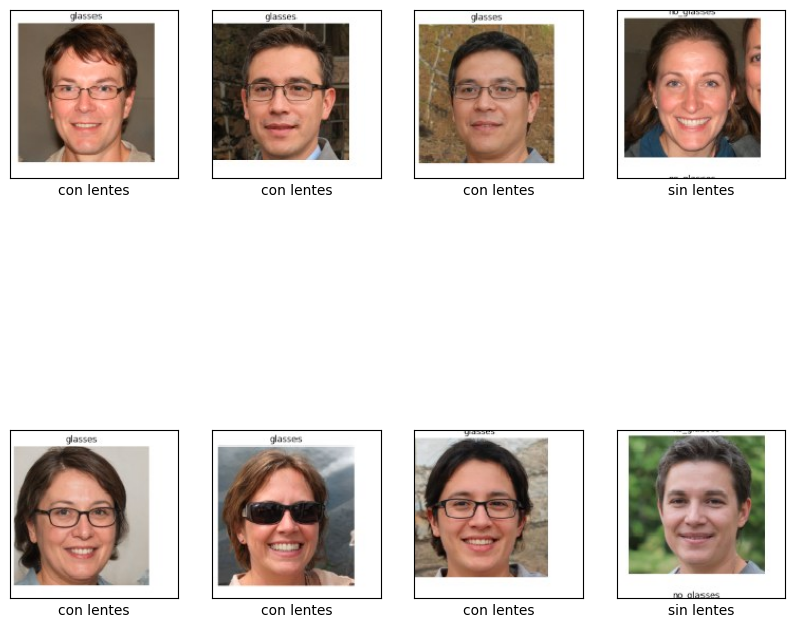

In [20]:
# Definimos las clases
class_names = ['con lentes', 'sin lentes']
plt.figure(figsize=(10,10))

# Obtener un lote de imágenes y etiquetas
images, labels = next(train_images)

for i in range(8):  # Asumiendo que quieres visualizar 8 imágenes
    plt.subplot(2, 4, i + 1)  # Ajusta el subplot para 8 imágenes
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].astype('uint8'))  # Conversión para visualización correcta
    plt.xlabel(class_names[np.argmax(labels[i])])  # Asumiendo que las etiquetas están en formato categórico

plt.show()


In [21]:
# importamos librerias
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# preparamos el modelo
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [15]:
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Agregar capa de dropout antes de la primera capa densa
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.5))  # Agregar capa de dropout antes de la segunda capa densa
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))  # Para una clasificación binaria

In [13]:
# vemos el modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 79, 79, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 38, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 18, 18, 128)      

In [23]:
# agregamos capas dense y flatten
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))
#model.add(layers.Dense(2, activation='sigmoid'))



In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
# vemos el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 79, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 128)       0

In [16]:
# compilamos y entrenamos el modelo
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

#from tensorflow.keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#history = model.fit(train_images, epochs=30, validation_data=test_images, callbacks=[early_stopping])

history = model.fit(train_images , epochs=10, validation_data=(test_images))

Epoch 1/10
4/4 [==============================] - 10s 2s/step - loss: 0.7035 - accuracy: 0.5096 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.7155 - accuracy: 0.5192 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.6938 - accuracy: 0.4615 - val_loss: 0.6838 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 0.6581 - accuracy: 0.6442 - val_loss: 0.6507 - val_accuracy: 0.6500
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 0.6393 - accuracy: 0.6635 - val_loss: 0.6129 - val_accuracy: 0.7000
Epoch 6/10
4/4 [==============================] - 8s 2s/step - loss: 0.5843 - accuracy: 0.6538 - val_loss: 0.7422 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.5291 - accuracy: 0.7019 - val_loss: 0.6847 - val_accuracy: 0.6000
Epoch 8/10
4/4 [========================

In [ ]:
#print(len(history.history['accuracy']))

#print(len(history.history['acc']))
print(history.history['accuracy'])

print(history.history['val_accuracy'])

[0.6153846383094788, 0.817307710647583, 0.9038461446762085, 0.9038461446762085, 0.942307710647583, 0.9519230723381042, 0.9711538553237915, 0.9519230723381042, 0.9903846383094788, 0.9903846383094788]
[0.5, 0.574999988079071, 0.5249999761581421, 0.6000000238418579, 0.625, 0.6499999761581421, 0.6000000238418579, 0.675000011920929, 0.625, 0.6000000238418579]


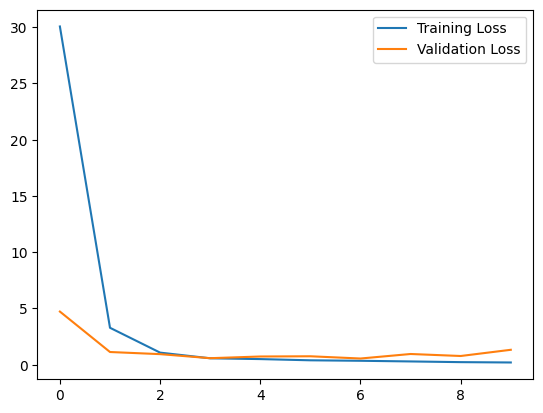

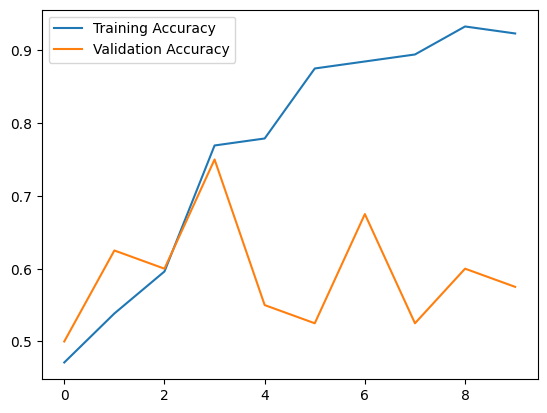

In [25]:
import matplotlib.pyplot as plt

# Visualización de curvas de pérdida y precisión
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

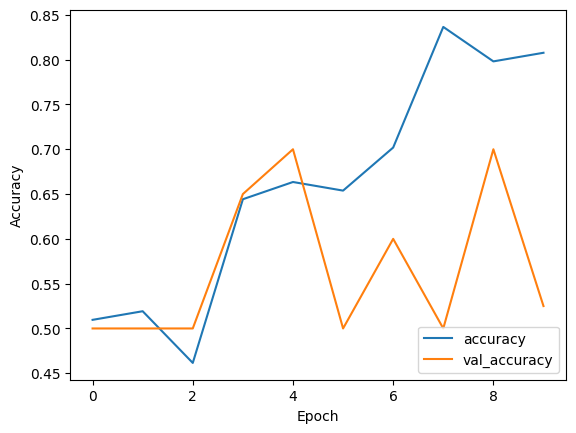

In [17]:
#evaluamos el modelo

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [18]:
#guardamos el modelo
model.save("pruebas")

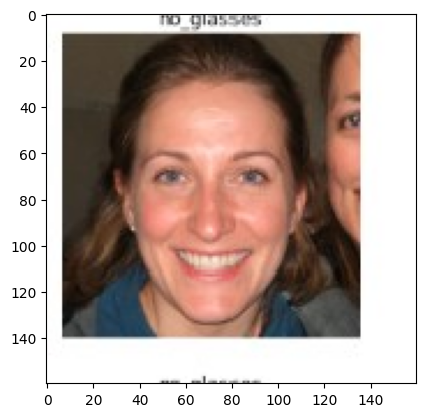

1/1 [==============================] - 0s 119ms/step
sin gafas


In [24]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Cargar la imagen
img_path = "/content/drive/MyDrive/TF/glasses-noglasses/test/row-7-column-6.jpg"
img = image.load_img(img_path, target_size=(160, 160))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalizar los valores de píxeles al rango [0, 1]

# Visualizar la imagen
plt.imshow(img_array[0])
plt.show()

# Cargar el modelo
saved_model = load_model("pruebas")

# Realizar la predicción
prediction = saved_model.predict(img_array)

# Imprimir la predicción
if prediction[0][0] > 0.5:
    print("sin gafas")
else:
    print("gafas")

1/1 [==============================] - 0s 272ms/step
glasses


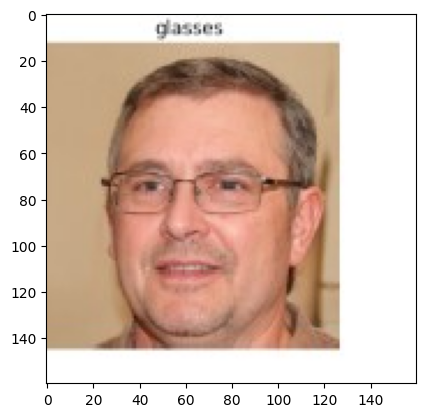

In [28]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/TF/glasses-noglasses/test/row-1-column-9.jpg",target_size=(160,160))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("pruebas")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("glasses")
else:
    print('no-glasses')